# **HBO Max Recommendation System**

HBO Max is a subscription-based streaming platform that allows users to watch movies and TV shows without advertisements. One of the reasons behind the popularity of the platform is its recommendation system.

The recommendation system of HBO Max shows us movies and TV shows according to our interests. One of factors that decided the recommendation is genres. It helps the platform recommend more content even to new users.

Using HBO Max TV Shows and Movies from [kaggle](https://www.kaggle.com/datasets/victorsoeiro/hbo-max-tv-shows-and-movies), I will try do some analysis and also create HBO Max Recommendation System.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Load Data and Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Data Science/HBO movie recommendation/titles.csv')
data.head(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",['US'],NaN,tt0032138,8.1,389774.0,41.442,7.6
1,tm83648,Citizen Kane,MOVIE,"Newspaper magnate, Charles Foster Kane is take...",1941,PG,119,['drama'],['US'],NaN,tt0033467,8.3,433804.0,14.383,8.0
2,tm77588,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1942,PG,102,"['drama', 'romance', 'war']",['US'],NaN,tt0034583,8.5,558849.0,20.087,8.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3294 non-null   object 
 1   title                 3294 non-null   object 
 2   type                  3294 non-null   object 
 3   description           3282 non-null   object 
 4   release_year          3294 non-null   int64  
 5   age_certification     2086 non-null   object 
 6   runtime               3294 non-null   int64  
 7   genres                3294 non-null   object 
 8   production_countries  3294 non-null   object 
 9   seasons               756 non-null    float64
 10  imdb_id               2968 non-null   object 
 11  imdb_score            2922 non-null   float64
 12  imdb_votes            2911 non-null   float64
 13  tmdb_popularity       3261 non-null   float64
 14  tmdb_score            3026 non-null   float64
dtypes: float64(5), int64(

- There are 3294 rows and 15 columns, but I will only use some columns for analysis and create recommendation system.
- There are some missing values in some columns. But I will do handle missing values later.
- It seems in `genres` need to be cleaned first before do analysis.

# **Data Preprocess**

In [5]:
# Take interesting columns
data = data[['title', 'description', 'type', 'release_year', 'age_certification', 'genres', 'imdb_score']]
data.head(3)

,title,description,type,release_year,age_certification,genres,imdb_score
0,The Wizard of Oz,Young Dorothy finds herself in a magical world...,MOVIE,1939,G,"['fantasy', 'family']",8.1
1,Citizen Kane,"Newspaper magnate, Charles Foster Kane is take...",MOVIE,1941,PG,['drama'],8.3
2,Casablanca,"In Casablanca, Morocco in December 1941, a cyn...",MOVIE,1942,PG,"['drama', 'romance', 'war']",8.5


In [6]:
# Check duplicated data
data.duplicated().sum()

0

In [7]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1940 entries, 0 to 3283
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1940 non-null   object 
 1   description        1940 non-null   object 
 2   type               1940 non-null   object 
 3   release_year       1940 non-null   int64  
 4   age_certification  1940 non-null   object 
 5   genres             1940 non-null   object 
 6   imdb_score         1940 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 121.2+ KB


In [8]:
# Clean genres column
data['genres'] = data['genres'].map(lambda x: x.strip("[]''"))
data['genres'] = data['genres'].str.replace("'","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
data['genres'].tolist()

['fantasy, family',
 'drama',
 'drama, romance, war',
 'war, romance, drama, history',
 'thriller, european, crime',
 'romance, drama, comedy',
 'comedy, european, romance, war',
 'drama, comedy, romance, family',
 'drama, family',
 'drama, family, sport',
 'drama',
 'comedy, family, romance, european',
 'romance, crime, european, drama',
 'drama',
 'drama, family',
 'romance, comedy, music',
 'thriller, horror, drama',
 'scifi',
 'drama, history',
 'comedy, family, fantasy',
 'animation, comedy, crime, family',
 'drama, thriller',
 'comedy, romance',
 'thriller, scifi, crime',
 'drama',
 'comedy, sport',
 'drama, crime, scifi',
 'thriller, drama, history',
 'comedy, romance',
 'thriller, crime, drama, romance',
 'drama',
 'crime, thriller, drama',
 'family, animation, comedy',
 'family, fantasy, music, animation, comedy',
 'animation, family, scifi, comedy',
 'drama, scifi',
 'drama, comedy, sport, romance',
 'thriller, crime, action',
 'comedy, drama',
 'comedy',
 'fantasy, family',


In [10]:
data.head(3)

,title,description,type,release_year,age_certification,genres,imdb_score
0,The Wizard of Oz,Young Dorothy finds herself in a magical world...,MOVIE,1939,G,"fantasy, family",8.1
1,Citizen Kane,"Newspaper magnate, Charles Foster Kane is take...",MOVIE,1941,PG,drama,8.3
2,Casablanca,"In Casablanca, Morocco in December 1941, a cyn...",MOVIE,1942,PG,"drama, romance, war",8.5


Now dataset is ready.

# **Exploratory Data Analysis**

1. How the distribution data based on `type` column?
2. What year with the most released movie or tv show?
3. How the distribution data based on `age_certification` column?
4. What top 10 with the highest `imdb_score`?

In [11]:
# Data distribution based on type column
data['type'].value_counts()

MOVIE    1357
SHOW      583
Name: type, dtype: int64

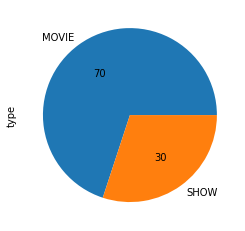

In [12]:
# Ratio
data['type'].value_counts().plot.pie(autopct='%.0f')

Movie is the most show type in HBO Max.

In [17]:
# Year with the most released movie or tv show (Top 20)
year_released = data.groupby('release_year').agg(total_show=('release_year',
                                                             'count')).reset_index().sort_values('total_show',ascending=False).head(20)

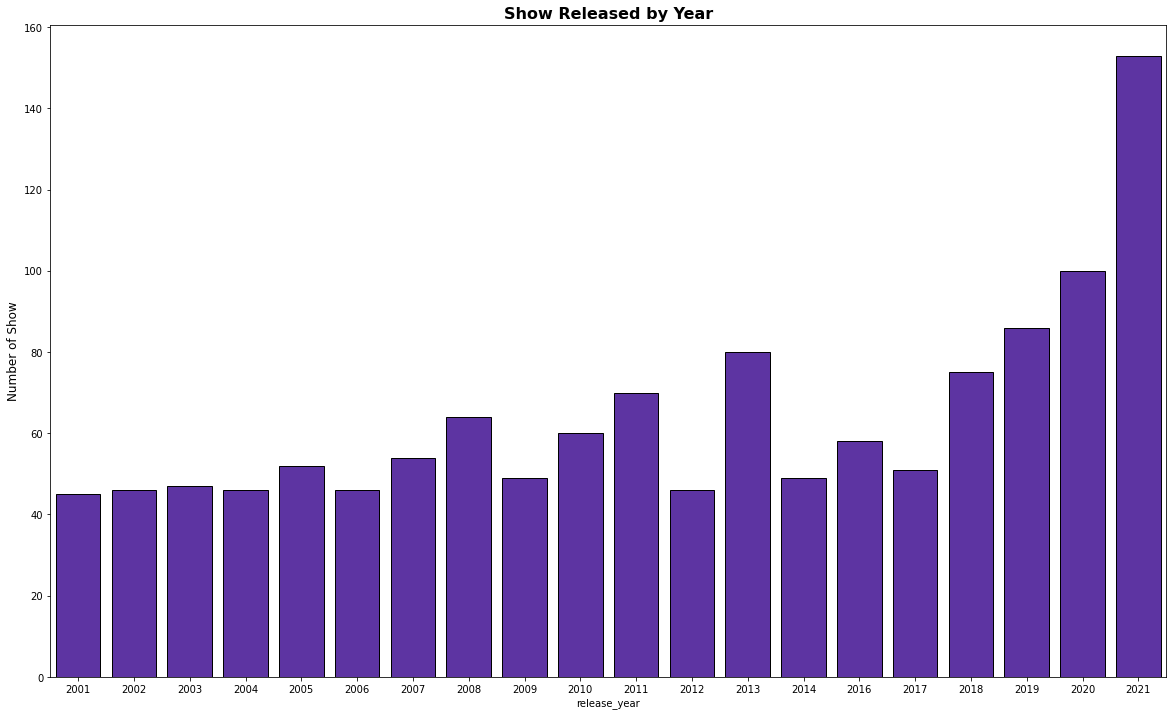

In [21]:
plt.figure(figsize=(20, 12))

plots = sns.barplot(x="release_year", y="total_show", data=year_released, color ='#5822b4', edgecolor='black')
 
plt.ylabel("Number of Show", size=12)
plt.title("Show Released by Year", fontsize=16, fontweight='bold')
plt.show()

As expected, the most movie and tv show in HBO Max are with the year released 2021 (New released).

In [20]:
# Number of movies and tv show based on age certification
age_certification = data.groupby('age_certification').agg(total_age=('age_certification', 
                                                                      'count')).reset_index().sort_values('total_age',ascending=False)

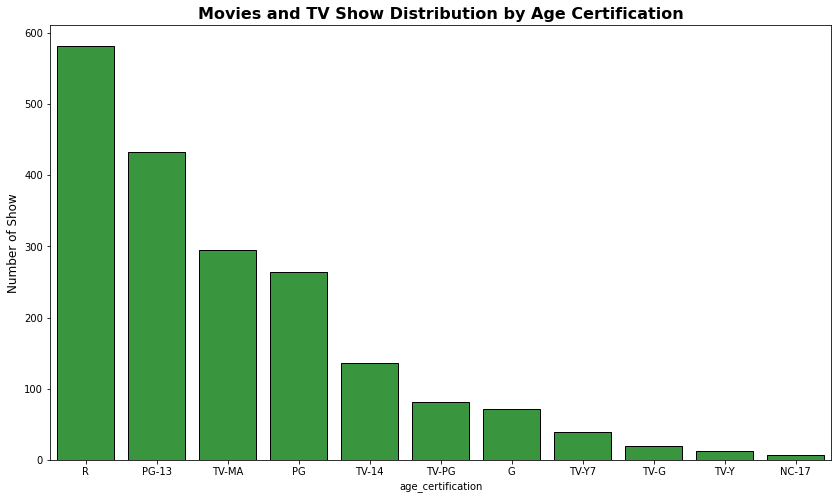

In [22]:
plt.figure(figsize=(14, 8))

plots = sns.barplot(x="age_certification", y="total_age", data=age_certification, color ='#29A632', edgecolor='black')
 
plt.ylabel("Number of Show", size=12)
plt.title("Movies and TV Show Distribution by Age Certification", fontsize=16, fontweight='bold')
plt.show()

R-Rated is the most movies and TV show in HBO Max. R-Rated is not suitable to be seen by children (under 17 years old) because of violence, offensive language, or sexual activity. So I think this platform needs to under parents or adults supevision.

In [33]:
# Movies and TV show with the highest imdb score
top_10 = data.sort_values('imdb_score', ascending=False).head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

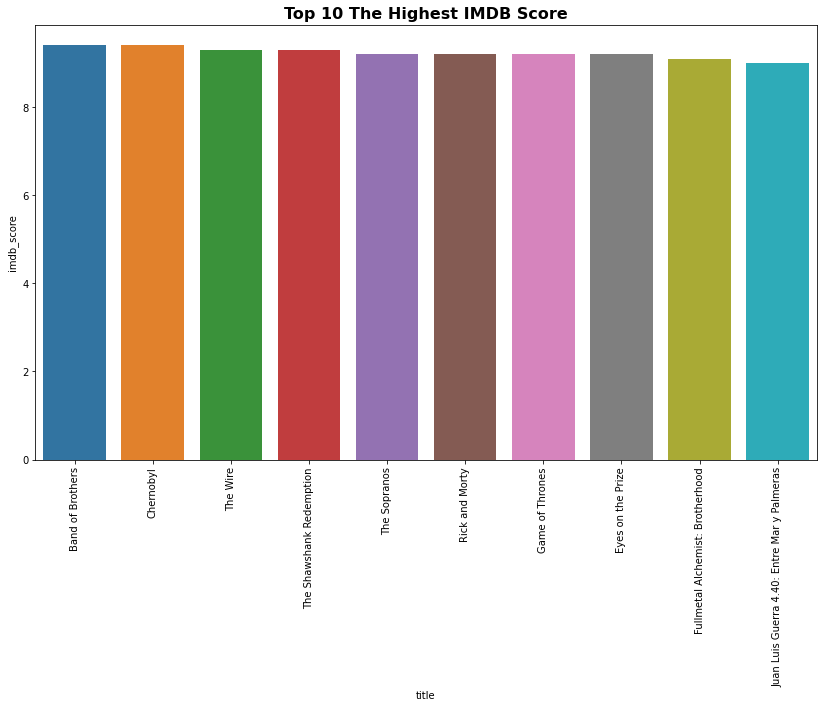

In [35]:
# Movies and TV show with the highest imdb score
plt.figure(figsize=(14,8))
sns.barplot(data=top_10, x='title', y='imdb_score')
plt.title("Top 10 The Highest IMDB Score", fontsize=16, fontweight='bold')
plt.xticks(rotation=90)

Top 10 Movies and TV Show have IMDB score above than 8, with the highest rating is Band of Brothers.

# **Text Processing**

Now, this is where the real work begin to create recommendation system. I will select three columns `title`, `descriptions`, and `genres`.

In [36]:
# Take interesting columns
data = data[['title', 'description', 'genres']]
data.head(5)

,title,description,genres
0,The Wizard of Oz,Young Dorothy finds herself in a magical world...,"fantasy, family"
1,Citizen Kane,"Newspaper magnate, Charles Foster Kane is take...",drama
2,Casablanca,"In Casablanca, Morocco in December 1941, a cyn...","drama, romance, war"
5,Gone with the Wind,The spoiled daughter of a well-to-do plantatio...,"war, romance, drama, history"
13,M,"In this classic German thriller, Hans Beckert,...","thriller, european, crime"


Now I will clean the Title column as it contains some data preparation. For the most part, I will use regular expression, nltk, Stemming using SnowballStemmer, and corpus.

In [37]:
# Import the needed libraries
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [38]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [39]:
# Clean data title
data["title"] = data["title"].apply(clean)

Now, take a look for samples of titles.

In [40]:
print(data.title.sample(20))

1437    madea famili reunion
642                babi boom
1934                kickass 
869             space cowboy
764             sens sensibl
1241             mighti wind
1044         pride  prejudic
3154                birdgirl
583              back school
845               women want
1760        looney tune show
734                 clueless
2212            batkid begin
1339                mindhunt
2609            kajillionair
1091         boardwalk empir
3118                 paradis
3090                    sort
624            fanni alexand
1008           miss ever boy
Name: title, dtype: object


Now I will use the genres column as the feature to recommend similar content. I will use the concept of cosine similarity here (used to find similarities in two documents).

In [42]:
feature = data["genres"].tolist()
tfidf = text.TfidfVectorizer(input=feature, stop_words="english")
tfidf_matrix = tfidf.fit_transform(feature)
similarity = cosine_similarity(tfidf_matrix)

In [43]:
# Set the title column as an index so that we can find similar content by giving the title of the movie or TV show as an input
indices = pd.Series(data.index,
                    index=data['title']).drop_duplicates()

In [44]:
# function to recommend Movies and TV shows on HBO Max
def HBO_recommendation(title, similarity = similarity):
    index = indices[title]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[0:20]
    movieindices = [i[0] for i in similarity_scores]
    return data['title'].iloc[movieindices]

In [46]:
# Show 20 movies or TV show recommendation based on title
print(HBO_recommendation('day thunder'))

1              citizen kane
76                 mice men
100            keeper flame
201    one flew cuckoo nest
208                 network
227          five easi piec
260      rebel without caus
345                    face
356               world apu
364              open night
369          tokyo twilight
559             color purpl
565                rain man
633                    lean
655              angel tabl
660                  chosen
695                judgment
713               west wing
729             boogi night
888              school tie
Name: title, dtype: object


# **Summary**

The recommendation system of HBO Max predicts a personalised catalogue for you based on factors like your viewing history, the viewing history of other users with similar tastes and preferences, and the genres. Based on analysis, this platform mainly for adults with 17 years old minimum, so it needs parents or aduts supervision.